In [1]:
## TEST SPLINE FITTING
# Given a set of 2D points, fits spline then plots
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d
import dubins


In [2]:
# Vehicle Constants (same as common.py)
x_lim = [-10, 10]
y_lim = [-10, 10]
theta_lim = [-np.pi, np.pi]
num_waypoints = 10
waypoint_tol = 0.2

wheelbase = 0.335
max_acc = 3
max_steering_angle = 0.5

In [3]:
# Generate random waypoints (same as waypoint_publisher.py)
waypoints = np.random.rand(num_waypoints, 3)
waypoints[:, 0] = (x_lim[1] - x_lim[0]) * waypoints[:, 0] + x_lim[0]
waypoints[:, 1] = (y_lim[1] - y_lim[0]) * waypoints[:, 1] + y_lim[0]
waypoints[:, 2] = (theta_lim[1] - theta_lim[0]) * waypoints[:, 2] + theta_lim[0]

In [40]:
turning_radius = 1
step_size = 0.5

path_list = np.empty((0,3))
for i in range(waypoints.shape[0] - 1):
    q0 = (waypoints[i,0], waypoints[i,1], waypoints[i,2])
    q1 = (waypoints[i+1,0], waypoints[i+1,1], waypoints[i+1,2])

    path = dubins.shortest_path(q0, q1, turning_radius)
    configurations, _ = path.sample_many(step_size)
    configurations = np.array(configurations)
#     print(configurations.shape)
    path_list = np.vstack((path_list, configurations))
    print(path_list.shape)

(8, 3)
(33, 3)
(53, 3)
(94, 3)
(121, 3)
(150, 3)
(172, 3)
(203, 3)
(218, 3)


In [41]:
path_list
# path_list = np.array(path_list)
# path_list.shape

array([[ 9.57457860e-01,  4.90311929e+00,  4.62717881e+00],
       [ 8.49853990e-01,  4.41533389e+00,  4.47085637e+00],
       [ 7.30258475e-01,  3.92984762e+00,  4.47085637e+00],
       [ 6.10662960e-01,  3.44436136e+00,  4.47085637e+00],
       [ 4.91067445e-01,  2.95887509e+00,  4.47085637e+00],
       [ 3.71471930e-01,  2.47338883e+00,  4.47085637e+00],
       [ 1.97770221e-01,  2.00795408e+00,  4.13059728e+00],
       [-1.67961789e-01,  1.67467496e+00,  3.63059728e+00],
       [-4.11686174e-01,  1.58335387e+00,  3.36958576e+00],
       [-8.51035961e-01,  1.35574314e+00,  3.86958576e+00],
       [-1.12747928e+00,  9.45360436e-01,  4.36958576e+00],
       [-1.17333317e+00,  4.52681740e-01,  4.86958576e+00],
       [-9.77370986e-01, -1.66801564e-03,  5.36958576e+00],
       [-5.87639097e-01, -3.06598088e-01,  5.85144103e+00],
       [-1.33520483e-01, -5.15825916e-01,  5.85144103e+00],
       [ 3.20598131e-01, -7.25053745e-01,  5.85144103e+00],
       [ 7.74716745e-01, -9.34281574e-01

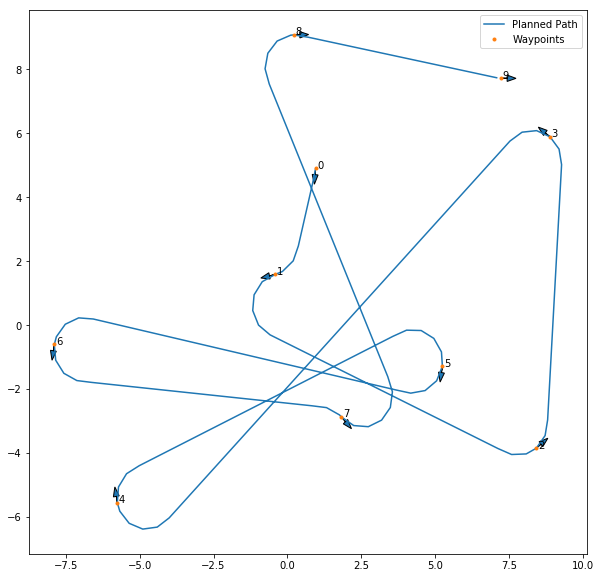

In [43]:
plt.figure(figsize=(10,10))
plt.plot(path_list[:,0], path_list[:,1], label="Planned Path")
# Plot waypoints and associated index
plt.plot(waypoints[:,0], waypoints[:,1],'.', label="Waypoints")
for i in range(num_waypoints):
    plt.text(waypoints[i,0]+0.05, waypoints[i,1], str(i))
    plt.arrow(waypoints[i,0], waypoints[i,1], 0.2 * np.cos(waypoints[i,2]), 0.2* np.sin(waypoints[i,2]), head_width=0.2)
plt.legend()
plt.show()
